# Tech challenge

In [269]:
# Importing all used libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st #hypothesis testing

# Data analysis

In [270]:
data=pd.read_csv('measurements.csv')

In [271]:
data.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


In [272]:
data.tail()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN
387,"14,7",5,25,25,30,AC,SP98,1,0,0,NaN,NaN


In [273]:
data.shape

(388, 12)

In [274]:
data.describe()

,speed,temp_outside,AC,rain,sun
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,41.927835,11.358247,0.077320,0.123711,0.082474
std,13.598524,6.991542,0.267443,0.329677,0.275441
min,14.000000,-5.000000,0.000000,0.000000,0.000000
25%,32.750000,7.000000,0.000000,0.000000,0.000000
50%,40.500000,10.000000,0.000000,0.000000,0.000000
75%,50.000000,16.000000,0.000000,0.000000,0.000000
max,90.000000,31.000000,1.000000,1.000000,1.000000


In [275]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    376 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas_type       388 non-null    object
 7   AC             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill liters  13 non-null     object
 11  refill gas     13 non-null     object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB


In [276]:
data.isna().sum()

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64

In [277]:
data[data['temp_inside'].isnull()]

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
93,"12,4","4,7",43,NaN,10,NaN,SP98,0,0,0,NaN,NaN
95,"11,8","5,3",52,NaN,11,NaN,SP98,0,0,0,NaN,NaN
97,"15,7","5,3",33,NaN,9,NaN,SP98,0,0,0,NaN,NaN
98,"12,9","5,7",35,NaN,9,NaN,SP98,0,0,0,NaN,NaN
99,"6,4","4,4",37,NaN,10,NaN,SP98,0,0,0,NaN,NaN
100,"5,3","4,1",34,NaN,9,NaN,SP98,0,0,0,NaN,NaN
102,"18,8",5,62,NaN,9,rain,SP98,0,1,0,NaN,NaN
201,"22,2","3,8",42,NaN,15,NaN,SP98,0,0,0,NaN,NaN
203,"12,6","4,1",33,NaN,17,NaN,SP98,0,0,0,NaN,NaN
261,"24,5","3,9",50,NaN,15,sun,E10,0,0,1,NaN,NaN


# Data cleaning

In [278]:
#replacing nulls
data['specials']=data['specials'].fillna('no specials')

In [279]:
data['refill liters']=data['refill liters'].fillna('0')

In [280]:
data['refill gas']=data['refill gas'].fillna('No refill')

In [281]:
data.isna().sum()

distance          0
consume           0
speed             0
temp_inside      12
temp_outside      0
specials          0
gas_type          0
AC                0
rain              0
sun               0
refill liters     0
refill gas        0
dtype: int64

In [282]:
#dropping rows with nulls in the columns 'temp_inside'
data=data.dropna(subset=['temp_inside'])

In [283]:
data.isna().sum()

distance         0
consume          0
speed            0
temp_inside      0
temp_outside     0
specials         0
gas_type         0
AC               0
rain             0
sun              0
refill liters    0
refill gas       0
dtype: int64

In [284]:
data.shape

(376, 12)

In [285]:
#renaming some concepts in 'specials' column
data['specials'].value_counts()

no specials           285
rain                   31
sun                    26
AC rain                 9
ac                      8
AC                      6
snow                    3
sun ac                  3
AC snow                 1
half rain half sun      1
AC sun                  1
AC Sun                  1
ac rain                 1
Name: specials, dtype: int64

In [286]:
data['specials']=data['specials'].replace('ac','AC').replace('sun ac','AC sun').replace('AC Sun','AC sun').replace('ac rain','AC rain')

In [287]:
data['specials'].value_counts()

no specials           285
rain                   31
sun                    26
AC                     14
AC rain                10
AC sun                  5
snow                    3
AC snow                 1
half rain half sun      1
Name: specials, dtype: int64

In [288]:
#changing some data types and replacing "," for "." to change the types
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 376 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       376 non-null    object
 1   consume        376 non-null    object
 2   speed          376 non-null    int64 
 3   temp_inside    376 non-null    object
 4   temp_outside   376 non-null    int64 
 5   specials       376 non-null    object
 6   gas_type       376 non-null    object
 7   AC             376 non-null    int64 
 8   rain           376 non-null    int64 
 9   sun            376 non-null    int64 
 10  refill liters  376 non-null    object
 11  refill gas     376 non-null    object
dtypes: int64(5), object(7)
memory usage: 38.2+ KB


In [289]:
data['distance']=data['distance'].str.replace(',','.')

In [290]:
data['consume']=data['consume'].str.replace(',','.')

In [291]:
data['temp_inside']=data['temp_inside'].str.replace(',','.')

In [292]:
data['refill liters']=data['refill liters'].str.replace(',','.')

In [293]:
data.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,21.5,12,no specials,E10,0,0,0,45,E10
1,12,4.2,30,21.5,13,no specials,E10,0,0,0,0,No refill
2,11.2,5.5,38,21.5,15,no specials,E10,0,0,0,0,No refill
3,12.9,3.9,36,21.5,14,no specials,E10,0,0,0,0,No refill
4,18.5,4.5,46,21.5,15,no specials,E10,0,0,0,0,No refill


In [294]:
data['distance']=pd.to_numeric(data['distance'], downcast='float')

In [295]:
data['consume']=pd.to_numeric(data['consume'], downcast='float')

In [296]:
data['temp_inside']=pd.to_numeric(data['temp_inside'], downcast='float')

In [297]:
data['refill liters']=pd.to_numeric(data['refill liters'], downcast='float')

In [299]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 376 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       376 non-null    float32
 1   consume        376 non-null    float32
 2   speed          376 non-null    int64  
 3   temp_inside    376 non-null    float32
 4   temp_outside   376 non-null    int64  
 5   specials       376 non-null    object 
 6   gas_type       376 non-null    object 
 7   AC             376 non-null    int64  
 8   rain           376 non-null    int64  
 9   sun            376 non-null    int64  
 10  refill liters  376 non-null    float32
 11  refill gas     376 non-null    object 
dtypes: float32(4), int64(5), object(3)
memory usage: 32.3+ KB


# Correlations

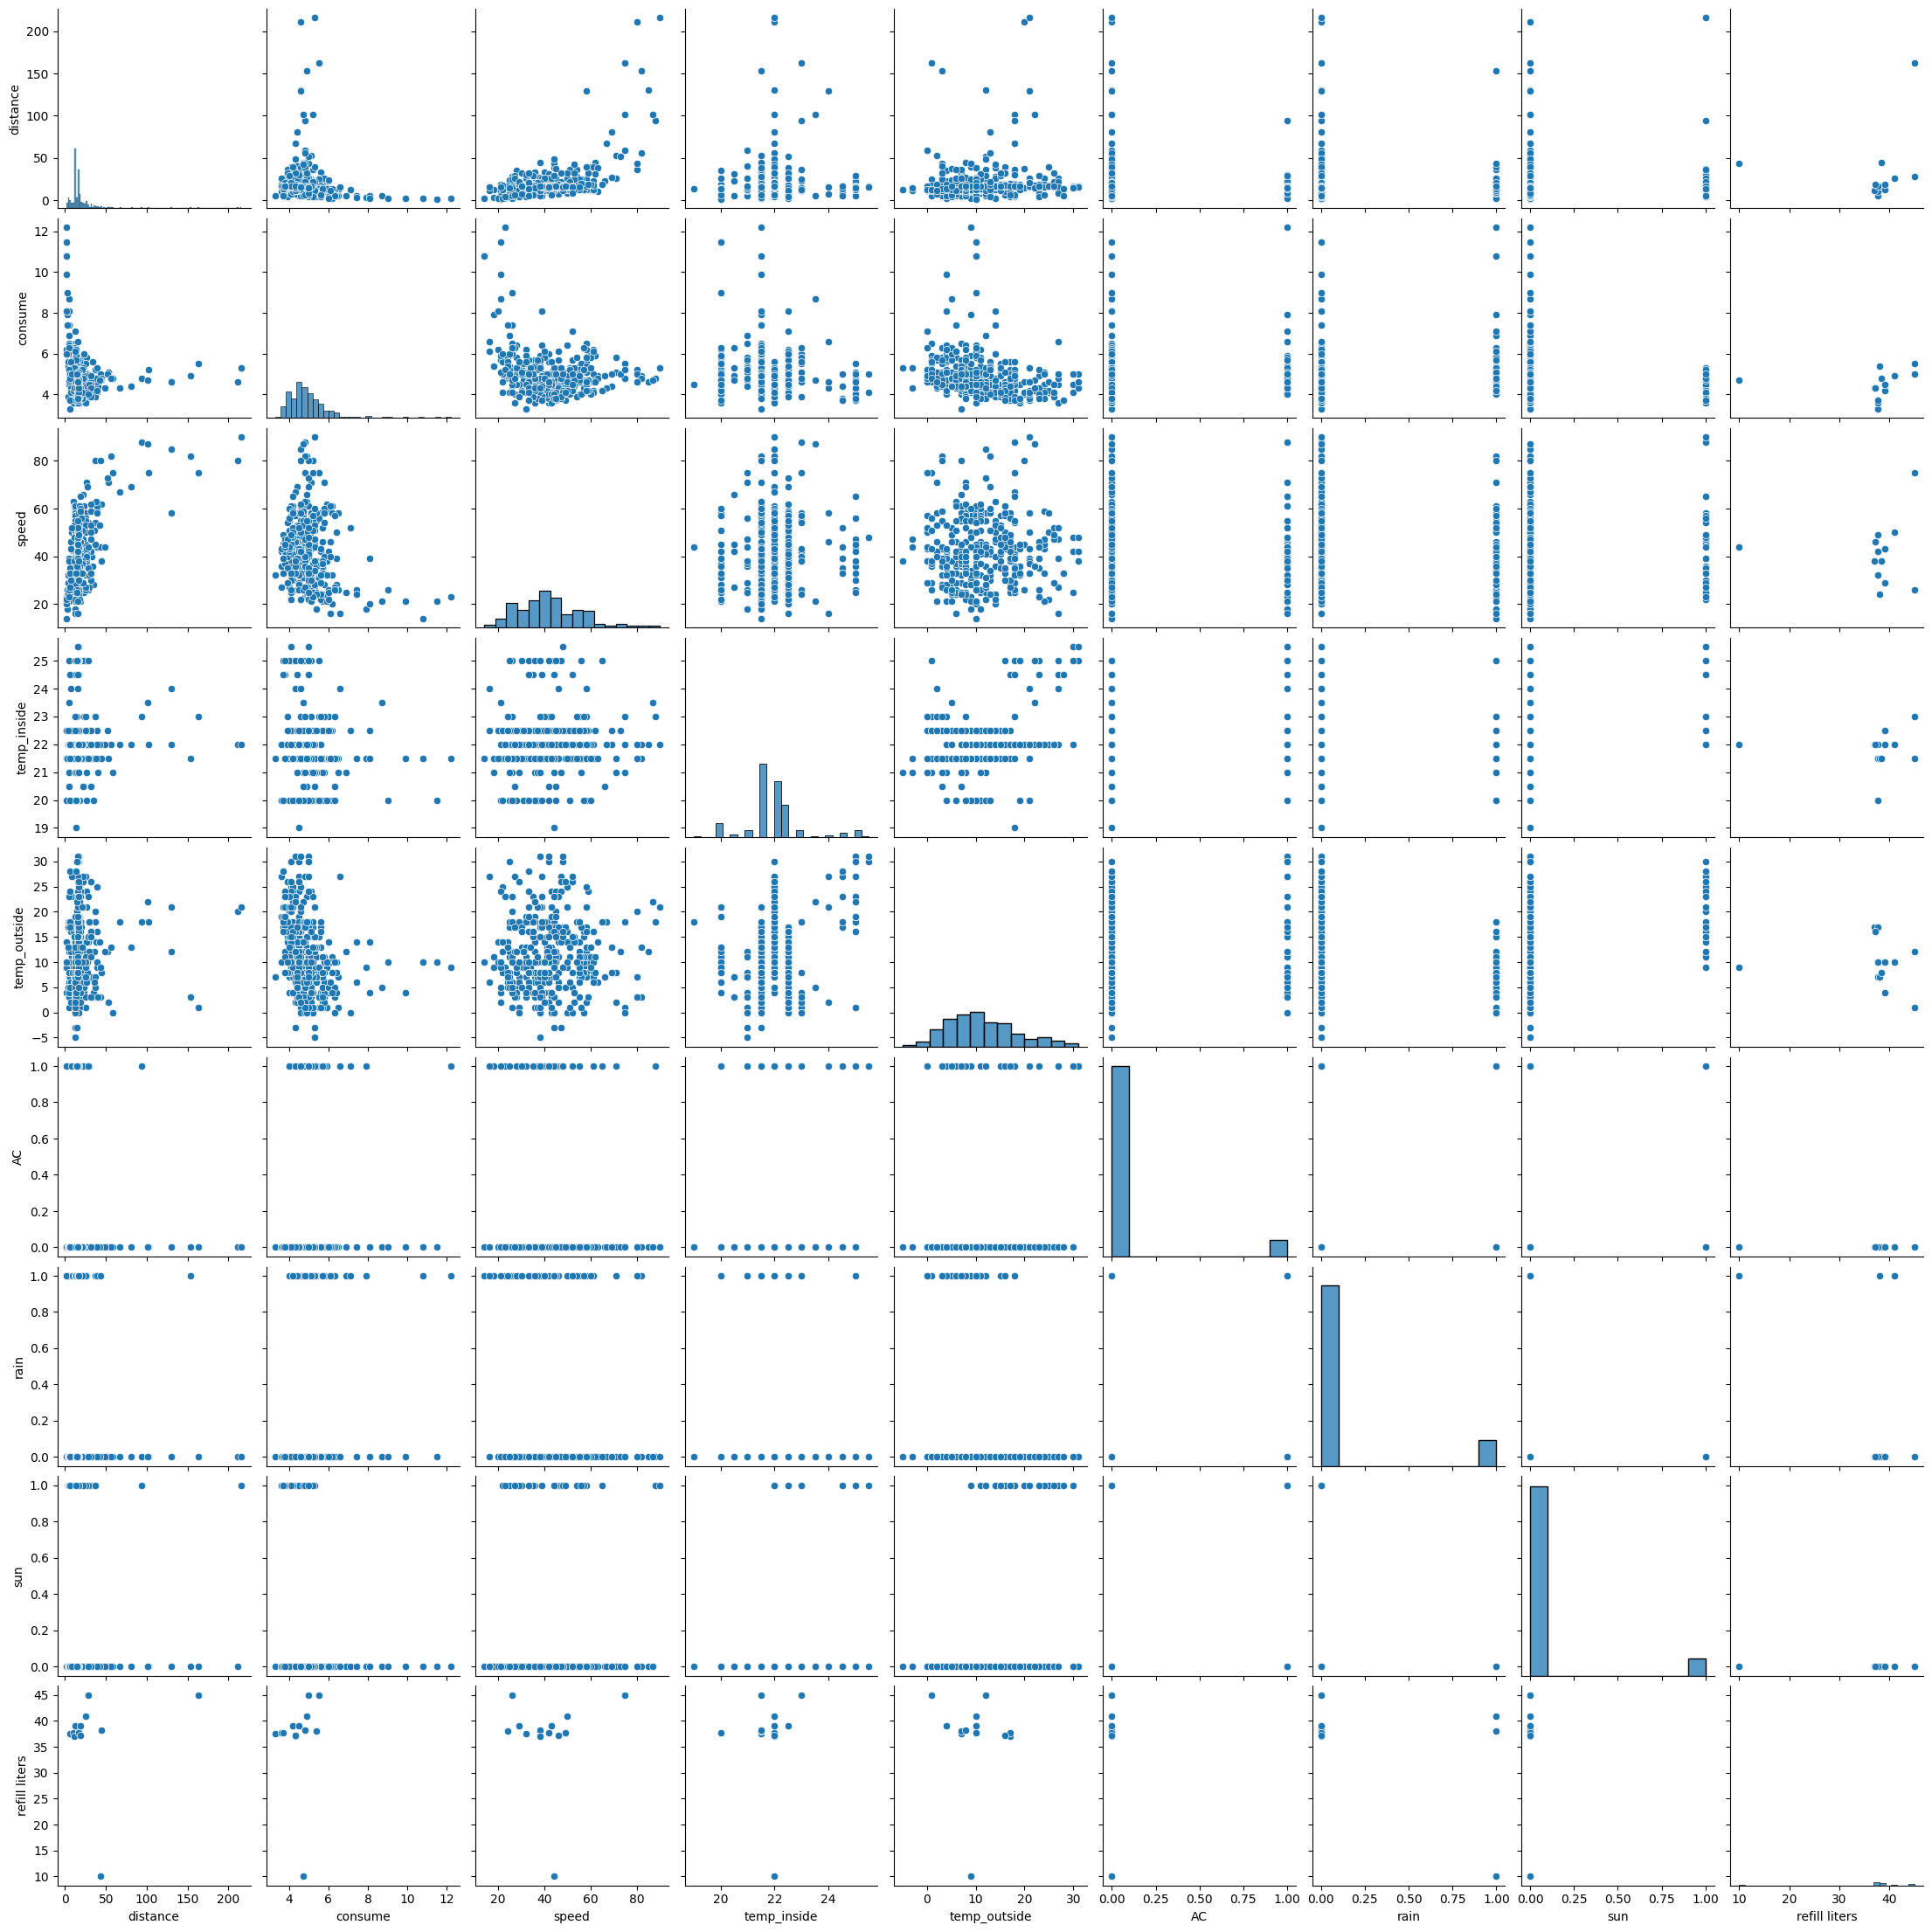

In [224]:
g=sns.pairplot(data)

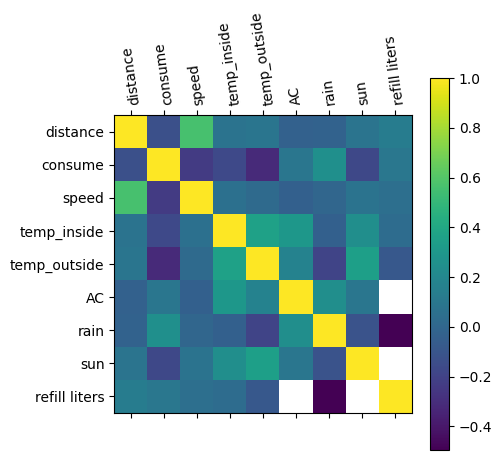

In [225]:
plt.matshow(data.corr())
plt.xticks(range(9),data.corr().columns, rotation=98)
plt.yticks(range(9),data.corr().columns)
plt.colorbar()
plt.show()

In [226]:
#consume is negatively realted to speed, temp_outside, sun

In [300]:
corr_df = data.corr()
corr_df

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,refill liters
distance,1.000000,-0.131379,0.565505,0.075305,0.086774,-0.027670,-0.022129,0.078627,0.106120
consume,-0.131379,1.000000,-0.234537,-0.161991,-0.318758,0.093892,0.247699,-0.169173,-0.077056
speed,0.565505,-0.234537,1.000000,0.059725,0.019327,-0.036351,-0.002936,0.077181,-0.007904
temp_inside,0.075305,-0.161991,0.059725,1.000000,0.361308,0.297775,-0.037356,0.246120,-0.021359
temp_outside,0.086774,-0.318758,0.019327,0.361308,1.000000,0.169374,-0.185731,0.349988,-0.041360
AC,-0.027670,0.093892,-0.036351,0.297775,0.169374,1.000000,0.244848,0.090164,-0.054350
rain,-0.022129,0.247699,-0.002936,-0.037356,-0.185731,0.244848,1.000000,-0.113298,0.033183
sun,0.078627,-0.169173,0.077181,0.246120,0.349988,0.090164,-0.113298,1.000000,-0.055329
refill liters,0.106120,-0.077056,-0.007904,-0.021359,-0.041360,-0.054350,0.033183,-0.055329,1.000000


In [301]:
data.describe()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,refill liters
count,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.00000,376.000000,376.000000
mean,19.797337,4.925264,41.957447,21.929522,11.340426,0.079787,0.12500,0.082447,1.283245
std,22.988884,1.040705,13.714354,1.010455,7.066999,0.271325,0.33116,0.275411,6.961578
min,1.300000,3.300000,14.000000,19.000000,-5.000000,0.000000,0.00000,0.000000,0.000000
25%,11.800000,4.300000,32.000000,21.500000,6.000000,0.000000,0.00000,0.000000,0.000000
50%,14.600000,4.700000,40.500000,22.000000,10.000000,0.000000,0.00000,0.000000,0.000000
75%,19.000000,5.300000,50.000000,22.500000,16.000000,0.000000,0.00000,0.000000,0.000000
max,216.100006,12.200000,90.000000,25.500000,31.000000,1.000000,1.00000,1.000000,45.000000


In [302]:
data.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,no specials,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,no specials,E10,0,0,0,0.0,No refill
2,11.2,5.5,38,21.5,15,no specials,E10,0,0,0,0.0,No refill
3,12.9,3.9,36,21.5,14,no specials,E10,0,0,0,0.0,No refill
4,18.5,4.5,46,21.5,15,no specials,E10,0,0,0,0.0,No refill


In [303]:
data[data['gas_type']=='E10']

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.000000,5.0,26,21.5,12,no specials,E10,0,0,0,45.0,E10
1,12.000000,4.2,30,21.5,13,no specials,E10,0,0,0,0.0,No refill
2,11.200000,5.5,38,21.5,15,no specials,E10,0,0,0,0.0,No refill
3,12.900000,3.9,36,21.5,14,no specials,E10,0,0,0,0.0,No refill
4,18.500000,4.5,46,21.5,15,no specials,E10,0,0,0,0.0,No refill
...,...,...,...,...,...,...,...,...,...,...,...,...
344,16.100000,5.1,30,25.0,16,AC rain,E10,1,1,0,0.0,No refill
345,16.000000,4.0,42,22.0,15,no specials,E10,0,0,0,0.0,No refill
346,15.400000,4.8,40,22.0,18,no specials,E10,0,0,0,0.0,No refill
347,17.200001,3.9,35,22.0,16,no specials,E10,0,0,0,0.0,No refill


# Hypotesis testing

In [304]:
#I think that the days that it is raining, the cars consume more than the average

FOR BOTH TYPES (SP98 AND E10)

In [305]:
#1.Set hypothesis
#TWO SIDED HYPOTESIS (two tailed)

#H0: cars in raining days, consume less or equal liters than/as the average = 4,91
#H1: cars in raining days, consume more liters than the average = 4,91  -> liters consumed in raining days > average 

#2.Significane level
#95% confidence level-> 1-0.95= 0.05 (5%)

#3.Sample
sample_h1=data[data['rain']==1]['consume']

#4.Statistic/ 5.P-value
st.ttest_1samp(sample_h1, 4.91, alternative= 'greater')

#6.Decide
#The p-value is lower than the significance level (5%). For that reason, I can reject the null hipothesis (H0:cars in raining days, consume less or equal liters than/as the average = 4,91)

Ttest_1sampResult(statistic=3.196265020051977, pvalue=0.001258774528975221)

# Conclusions

In [ ]:
#Conclusion 1 (using the Excel file to filter and analyse):

#With SP98 : 228 trips with a distance of 18,63 km on average, consumed 4,89 l on average
#With E10 : 160 trips with a distance of 21,09 km on average, consumed 4,93 l on average

#This means that if we do a ¿cross-multiplication? ("regla de 3"), 21,09 km on average with SP98 would consume 5,53 l 
#and with E10 consumed 0.6 l less

#This means that on average, E10 consumes less than SP98 driving the same distance 



############################

#Conclusion 2: 

#Using hypotesis testing, I found that we can reject the following hypoteshis: cars in raining days, consume less or equal liters than/as the average = 4,91
#This means that Cobify as a company, should be more focused on countries/cities with good weather conditions during the year to save money in combustible


############################

#Conclusion 3:

#E10:

#Raining days: 16,6 km distance on average -> 5,6 liters consumed
#Not raining days: 21,59 km -> 4,8 l
    
#SP98:

#Raining days: 19,36 km distance on average -> 5,59 liters consumed
#Not raining days: 18,52 km -> 4,78 l

#If we use again cross multiplication:
#If we drive 19,36 km with E10, it would consume 6,53 l. So, we can conclude that in raining days, E10 consumes more liters than SP98


############################

#Final conclusion:

#If Cobify is going to operate in cities where the propabiblity of rain during the year is high, SP98 will consume less liters on average.
#Otherwise, E10 in general and on average consumes less liters than SP98.
    